In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#匯入資料
data = pd.read_csv('data/electricity.csv')

In [3]:
# 針對用電量設定類別
def get_consumption_category(wt):
    if wt < 200:
        return 1
    elif 200 < wt < 400:
        return 2
    elif 400 < wt < 600:
        return 3
    elif 600 < wt < 800:
        return 4
    elif 800 < wt < 1000:
        return 5
    elif 1000 < wt < 1200:
        return 6
    else:
        return 7

data["electricity_consumption_category"] = data["electricity_consumption"].map(get_consumption_category)

In [4]:
df = data[['temperature','pressure', 'windspeed', 'electricity_consumption_category']]
df.head()

,temperature,pressure,windspeed,electricity_consumption_category
0,-11.4,1003.0,571.910,2
1,-12.1,996.0,575.040,2
2,-12.9,1000.0,578.435,2
3,-11.4,995.0,582.580,2
4,-11.4,1005.0,586.600,2


# 描述性分析

In [5]:
df.describe()

,temperature,pressure,windspeed,electricity_consumption_category
count,26496.000000,26496.000000,26496.000000,26496.000000
mean,5.098989,986.450615,23.959956,2.071143
std,8.682860,12.002647,48.280321,0.585504
min,-17.100000,953.000000,1.075000,1.000000
25%,-2.900000,978.000000,3.155000,2.000000
50%,6.400000,986.000000,6.545000,2.000000
75%,12.100000,995.000000,22.260000,2.000000
max,23.600000,1024.000000,586.600000,7.000000


# 散佈圖(兩個特徵一組)

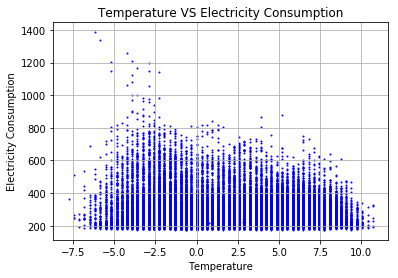

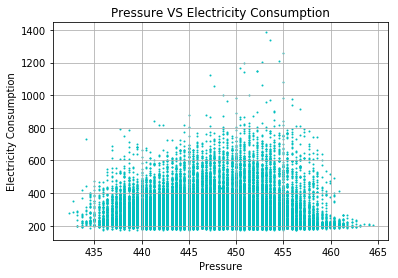

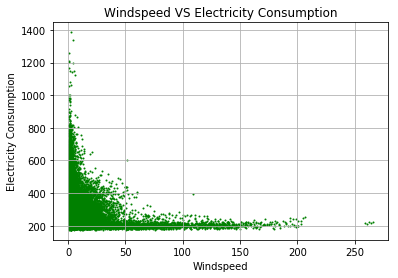

In [6]:
# 溫度、氣壓、風速分別和用電量關係之散佈圖
data['temperature'] = data['temperature'].apply(lambda x:0.453592*x)
data.plot.scatter(x='temperature', y='electricity_consumption',s=1,c='b')
plt.title('Temperature VS Electricity Consumption')
plt.xlabel('Temperature')
plt.ylabel('Electricity Consumption')
plt.grid(True)

data['pressure'] = data['pressure'].apply(lambda x:0.453592*x)
data.plot.scatter(x='pressure', y='electricity_consumption',s=1,c='c')
plt.title('Pressure VS Electricity Consumption')
plt.xlabel('Pressure')
plt.ylabel('Electricity Consumption')
plt.grid(True)

data['windspeed'] = data['windspeed'].apply(lambda x:0.453592*x)
data.plot.scatter(x='windspeed', y='electricity_consumption',s=1,c='g')
plt.title('Windspeed VS Electricity Consumption')
plt.xlabel('Windspeed')
plt.ylabel('Electricity Consumption')
plt.grid(True)

In [7]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [8]:
# 分割數據集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [9]:
# 標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 相關矩陣

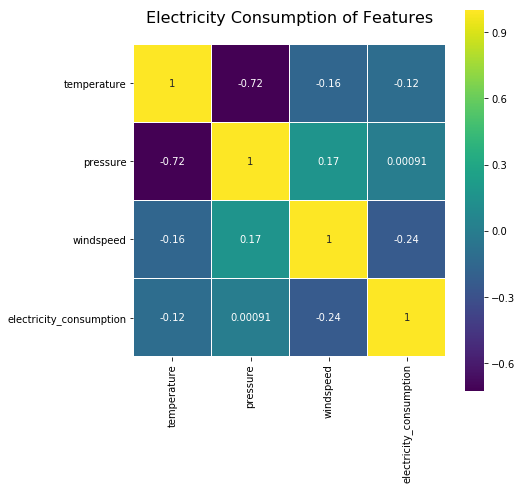

In [10]:
data = data[['temperature','pressure', 'windspeed','electricity_consumption']]

# 分析特徵的兩兩相關
colormap = plt.cm.viridis
plt.figure(figsize=(7,7))
plt.title('Electricity Consumption of Features', y=1.05, size=16)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

# eigenvalue分解

In [11]:
# 計算特徵值
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues : \n%s' % eigen_vals)


Eigenvalues : 
[1.79429993 0.27268489 0.93317694]


# 共變異數矩陣

In [12]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

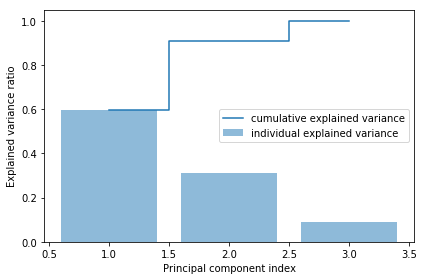

In [13]:
plt.bar(range(1, 4), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 4), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 特徵轉換

In [14]:
# 列出（特徵值，特徵向量）tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# 將（特徵值，特徵向量）tuples從高到低排序
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(1.7942999322348152, array([-0.67812685,  0.67999828,  0.27883027])),
 (0.9331769363203865, array([ 0.20458604, -0.18973699,  0.96028351])),
 (0.27268489139306656, array([ 0.70589555,  0.70823881, -0.01045241]))]

# 主成份矩陣

In [15]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('\nMatrix W:\n', w)


Matrix W:
 [[-0.67812685  0.20458604]
 [ 0.67999828 -0.18973699]
 [ 0.27883027  0.96028351]]


In [16]:
X_train_std[0].dot(w)

array([-1.28203607,  0.03483451])

# 散佈圖

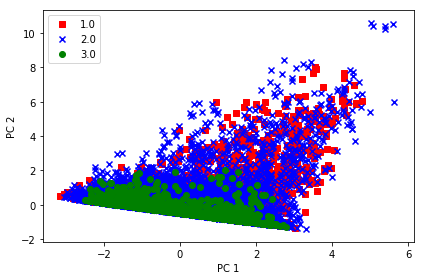

In [17]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 選出主成份(比較不同數目主成份的MSE)

In [18]:
from sklearn.linear_model import LinearRegression

#MSE
temperatures = data[['temperature']].values
electricity_consumption = data['electricity_consumption'].values

# 轉換維度
temperatures = np.reshape(temperatures, (len(temperatures), 1))
electricity_consumption = np.reshape(electricity_consumption, (len(electricity_consumption), 1))

lm = LinearRegression()
lm.fit(temperatures, electricity_consumption)

# 模型績效
mse = np.mean((lm.predict(temperatures) - electricity_consumption) ** 2)

# 印出模型績效
print("MSE : %.3f" % (mse))

MSE : 11507.582


# 直接用scikit learn的PCA和迴歸分析

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.59806773, 0.31104221, 0.09089006])

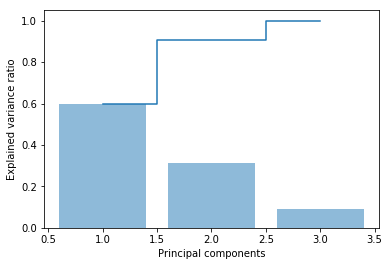

In [20]:
plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 4), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [21]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

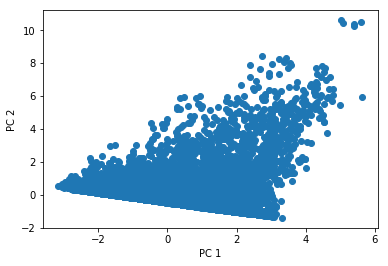

In [22]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()